<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [2]:
# # LIBRARY FOR WEB SCRAPING

# from bs4 import BeautifulSoup
# import requests

## 2) Use Spacy to tokenize / clean the listings 

In [3]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [4]:
nlp = spacy.load('en_core_web_lg')

In [5]:
df = pd.read_csv('E:/Desktop/Lambda_School/Github Repos/DS-Unit-4-Sprint-1-NLP/module2-vector-representations/data/job_listings.csv')

In [6]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [7]:
df = df.drop(columns="Unnamed: 0")

In [8]:
# remove html code
from bs4 import BeautifulSoup

def remove_html(df):
    df = df.copy()
    df['description'] = df['description'].str.replace('\\n', '')
    df['description'] = df['description'].str.replace('\\n\\n', '')
    df['description'] = df['description'].str.replace('b"', '')
    df['description'] = df['description'].str.replace("b'", '')
    
    # REMOVE NON-ALPHANUMERIC CHARACTERS
    df = df.applymap(lambda text: BeautifulSoup(text, 'html.parser').get_text())
    df['description'] = df['description'].str.replace(r'[^a-zA-Z ^0-9]', ' ')
    df['description'] = df['description'].str.replace(' n', ' ')
    df['description'] = df['description'].str.replace('xe2', ' ')
    df['description'] = df['description'].str.replace('x80', ' ')
    df['description'] = df['description'].str.replace('x93', ' ')
    df['description'] = df['description'].str.replace('x9', ' ')
    
    return df

remove_html(df)

,description,title
0,Job Requirements Conceptual understanding in ...,Data scientist
1,Job Description As a Data Scientist 1 you wi...,Data Scientist I
2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level
3,4 969 6 756 a monthContractUnder the gener...,Data Scientist
4,Location USA multiple locations 2 yea...,Data Scientist
5,Create various Business Intelligence Analytica...,Data Scientist
6,As Spotify Premium swells to over 96M subscrib...,Associate Data Scientist – Premium Analytics
7,Everytown for Gun Safety the ation s largest ...,Data Scientist
8,MS in a quantitative discipline such as Statis...,Sr. Data Scientist
9,Slack is hiring experienced data scientists to...,"Data Scientist, Lifecyle"


In [9]:
df = remove_html(df)

In [10]:
# def tokenize(text):
#     """Parses a string into a list of semantic units (words)

#     Args:
#         text (str): The string that the function will tokenize.

#     Returns:
#         list: tokens parsed out by the mechanics of your choice
#     """
    
#     tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
#     tokens = tokens.lower().split()
    
#     return tokens

In [11]:
# df['tokens'] = df['description'].apply(tokenize)

In [12]:
# df['tokens']

In [13]:
STOP_WORDS = nlp.Defaults.stop_words.union(['', ' ','  ','   ','    ','     ',
                                            '      ','x80', 'xe2', 'x93'])

In [14]:
tokenizer = Tokenizer(nlp.vocab)

In [15]:
tokens = []

for doc in tokenizer.pipe(df['description'], batch_size=1000):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [16]:
df['tokens']

0      [job, requirements, conceptual, understanding,...
1      [job, description, as, data, scientist, 1, hel...
2      [as, data, scientist, working, consulting, bus...
3      [4, 969, 6, 756, monthcontractunder, general, ...
4      [location, usa,        , multiple, locations, ...
5      [create, business, intelligence, analytical, r...
6      [as, spotify, premium, swells, 96m, subscriber...
7      [everytown, gun, safety, ation, s, largest, gu...
8      [ms, quantitative, discipline, statistics, mat...
9      [slack, hiring, experienced, data, scientists,...
10     [who, we, are, blackthorn, therapeutics, compu...
11     [part, timeabout, the, opportunity, here, grub...
12     [nfosys, data, analytics,        , sr, data, s...
13     [as, spotify, premium, swells, 96m, subscriber...
14     [experience, guiding, r, d, strategy, organiza...
15     [the, atlantic, seeking, data, scientist, help...
16     [the, challenge, eventbrite, big, bustling, ma...
17     [contractwe, looking, hi

In [17]:
# def get_lemmas(text):

#     lemmas = []
    
#     doc = nlp(text)
    
#     # Something goes here :P
#     for token in doc: 
#         if ((token.is_stop == False) and (token.is_punct == False)) and ((token not in STOP_WORDS) and (token.pos_!= 'PRON')):
#             lemmas.append(token.lemma_)
    
#     return lemmas

In [18]:
# df['lemmas'] = df['description'].apply(get_lemmas)

In [19]:
# df['lemmas'].head()

In [20]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [21]:
wc = count(df['tokens'])
wc_top20 = wc[wc['rank'] <= 20]
# wc_top20.iloc[0]
wc_top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
28,data,424,4466,1.0,0.031220,0.031220,0.995305
2,experience,405,1854,2.0,0.012961,0.044181,0.950704
316,business,323,1212,3.0,0.008473,0.052654,0.758216
57,work,360,1161,4.0,0.008116,0.060770,0.845070
263,team,342,988,5.0,0.006907,0.067677,0.802817
73,science,339,958,6.0,0.006697,0.074374,0.795775
201,we,294,922,7.0,0.006445,0.080819,0.690141
35,learning,310,919,8.0,0.006424,0.087243,0.727700
158,you,230,807,9.0,0.005641,0.092885,0.539906
365,analytics,249,736,10.0,0.005145,0.098030,0.584507


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [23]:
vect = CountVectorizer()

In [24]:
vect.fit(df['description'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [25]:
print(vect.get_feature_names())

['00', '000', '02115', '03', '0305', '0356', '04', '062', '06366', '08', '0if', '0paced', '10', '100', '1000', '1001', '1008', '100k', '100x', '1026036', '105', '1079302', '1082692', '10b', '10ms', '10x', '11', '110k', '112', '114157802', '12', '120', '125', '126', '130', '1315', '1324b', '138', '14', '140', '15', '150', '15000', '159m', '16', '1605', '165', '169334br', '17', '170', '17b', '18', '180', '180008jq', '18b', '19', '190', '190007ji', '19000bn4', '19000c1k', '19004162', '1901744', '1904', '1904labs', '1905', '19050', '1938', '1944', '1967', '1971', '1975', '1979', '1988', '199', '1994', '1999', '1b', '1st', '1strategy', '1tb', '20', '200', '2000', '200020183', '200041695', '2004', '2008', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2050', '21', '210', '2145', '2272', '24', '24m', '25', '250', '25256', '26', '260', '27', '28', '2nd', '2x', '30', '300', '30328', '30bn', '30k', '31', '317', '320', '3201', '33', '33051', '338', '35', '350', '

In [26]:
dtm = vect.transform(df['description'])

In [27]:
dtm

<426x8776 sparse matrix of type '<class 'numpy.int64'>'
	with 111490 stored elements in Compressed Sparse Row format>

In [28]:
print(dtm)

  (0, 265)	2
  (0, 545)	1
  (0, 620)	2
  (0, 660)	2
  (0, 688)	1
  (0, 714)	1
  (0, 728)	1
  (0, 751)	1
  (0, 811)	1
  (0, 988)	1
  (0, 1146)	1
  (0, 1558)	1
  (0, 1619)	1
  (0, 1703)	1
  (0, 1781)	1
  (0, 1792)	1
  (0, 2195)	1
  (0, 2256)	1
  (0, 2291)	1
  (0, 2615)	1
  (0, 2761)	1
  (0, 3004)	1
  (0, 3131)	2
  (0, 3148)	1
  (0, 3179)	1
  :	:
  (425, 8383)	1
  (425, 8420)	1
  (425, 8441)	1
  (425, 8471)	1
  (425, 8477)	1
  (425, 8498)	1
  (425, 8547)	1
  (425, 8571)	2
  (425, 8608)	1
  (425, 8614)	1
  (425, 8616)	1
  (425, 8622)	2
  (425, 8635)	3
  (425, 8637)	2
  (425, 8651)	10
  (425, 8653)	2
  (425, 8654)	1
  (425, 8664)	7
  (425, 8670)	1
  (425, 8673)	2
  (425, 8676)	1
  (425, 8747)	2
  (425, 8753)	1
  (425, 8758)	3
  (425, 8760)	1


In [29]:
dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
# WORD COUNTS FOR EACH LISTING
dtm = pd.DataFrame(dtm.todense(),columns=vect.get_feature_names())

In [31]:
dtm.shape

(426, 8776)

In [32]:
# WORD COUNTS FOR EACH LISTING
dtm.head()

,00,000,02115,03,0305,0356,04,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [33]:
import squarify

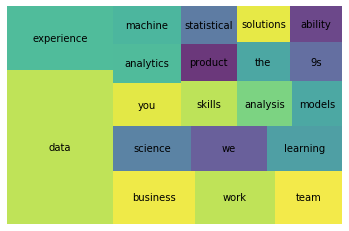

In [34]:
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_ for token in doc if (token.is_stop !=True) and (token.is_punct !=True)]

In [37]:
tfidf = TfidfVectorizer(stop_words = STOP_WORDS, tokenizer=tokenize, min_df=.025, max_df=.95, ngram_range=(1,2))

In [38]:
sparse_tfidf = tfidf.fit_transform(df['description'])

C:\Users\Sarmen\.conda\envs\U4-S1-M1\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['d', 'm', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [39]:
dtm_tfidf = pd.DataFrame(sparse_tfidf.todense(), columns=tfidf.get_feature_names())

In [40]:
# TFIDF FEATURE MATRIX
dtm_tfidf.head()

,,0,000,1,1 year,10,100,12,15,2,...,year 9,year datum,year experience,year hand,year industry,year professional,year relevant,year work,york,york city
0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.079100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.091968,0.0589,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.195808,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.166601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [41]:
from sklearn.neighbors import NearestNeighbors

In [42]:
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

In [43]:
nn.fit(dtm_tfidf)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [44]:
# CREATING AN ARRAY OF DOCS THAT ARE SIMILAR TO ENTRY 356 (201 IS CLOSEST, FOLLOWED BY 311)
nn.kneighbors([dtm_tfidf.iloc[356]])

(array([[0.        , 1.21409491, 1.23978005, 1.25130893, 1.25450602]]),
 array([[356, 201, 311, 281, 291]], dtype=int64))

In [45]:
df['description'][356][:500]

'InternshipOverview  Are you a geek for data  Do you love using analytics to help make decisions  Do you get so excited about coding breakthroughs that you forget about the hours it took you to find an errant comma  If so  we are looking for you  The Alteryx Community Content team is a small and dynamic team located in Broomfield  CO that works to create and maintain advanced analytic content for the Alteryx Community  We are looking for a dynamic  creative  and passionate DSIT  Data Scientist in'

In [46]:
df['description'][201][:500]

'InternshipOverview Data Science Internships Portland  OR or Seattle  WA These twelve week internships are scheduled to begin in May June 2019 Responsibilities   Requirements Cambia Health Solutions is working to create a seamless and frictionless health care experience for consumers ationwide  This presents a unique challenge and opportunity for innovative and disruptive solutions from our Artificial Intelligence team   Our Data Scientists design  develop  and implement data driven solutions usi'

In [47]:
# PERSONAL JOB QUERY (LOOKING FOR RESULTS RELATED TO MARKETING)
query = ['''marketing''']

In [48]:
new = tfidf.transform(query)

In [49]:
nn.kneighbors(new.todense())

(array([[1.02429505, 1.11355721, 1.16892001, 1.17377678, 1.19651647]]),
 array([[414, 230, 342, 278,  51]], dtype=int64))

In [50]:
df['description'][414][:500]

'We are looking for a Senior Data Scientist with marketing analytics background to join the Spotify product Insights team in New York City  As part of the Growth Opportunities department  you will lead insights for a ew team focused on Engineering Automated Marketing for user acquisition  Engineering Automated Marketing is the art and science of bringing the right content to the right users  at scale  Thanks to the power of Machine Learning  the depth of Spotify      9s catalog and our large user'

In [51]:
df['description'][230][:500]

'Spotify is seeking a Data Scientist  Advanced Marketing Analytics to build advanced marketing analytics solutions  You      9ll play a key role in expanding Spotify      9s marketing measurement abilities  The role reports into the Marketing Analytics team lead and there will be significant cross functional collaboration  In addition  you      9ll have the opportunity to leverage Spotify      9s world class user data infrastructure and collaborate with a global community of 100  data analysts   '

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 